In [16]:
#Annual preminum need to transform into log
#This is classification problem 

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer(Binary)

3. Age :	Age of the customer(Numeric)

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL(Binary)

5. Region_Code :	Unique code for the region of the customer(Numeric)

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance(Binary)

7. Vehicle_Age :	Age of the Vehicle(Numeric)

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.(Binary)

9. Annual_Premium	: The amount customer needs to pay as premium in the year(Numeric)

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.(Numeric)

11. Vintage :	Number of Days, Customer has been associated with the company(Numeric)

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df =pd.read_csv('/content/drive/MyDrive/Capstone2_Supervised_Classification/Code/Data/main_data.csv')

In [20]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#Logistic regression is able to classify on basis of 'Age' but not on basis of 'Annual Income' and 'Vintage'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [95]:
df.shape

(380840, 11)

In [25]:
df.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [26]:
df[df['Previously_Insured']==0].groupby('Region_Code',as_index=False)['id'].count().nlargest(10,'id')

,Region_Code,id
28,28.0,73233
8,8.0,16770
46,46.0,9456
41,41.0,7950
15,15.0,7037
3,3.0,4730
50,50.0,4629
36,36.0,4548
29,29.0,4497
47,47.0,4320


In [27]:
#top 10 regions having 
df[df['Previously_Insured']==1].groupby('Region_Code',as_index=False)['id'].count().nlargest(10,'id')

,Region_Code,id
28,28.0,33182
8,8.0,17107
41,41.0,10313
46,46.0,10293
30,30.0,8220
29,29.0,6568
15,15.0,6271
11,11.0,5718
50,50.0,5614
3,3.0,4521


In [28]:
df.shape

(381109, 12)

# As **'id'** is unique in entire data set so, this feature does not make any difference in evaluation.

#we can remove **id** from dataset set and further remove duplicate rows to reduce redundancy in dataset.

In [29]:
df.drop('id',axis=1,inplace=True)

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(380840, 11)

In [32]:
list(df.describe().columns)

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [33]:
numerical_feat=['Age','Annual_Premium','Vintage','Region_Code','Policy_Sales_Channel']
catagorical_feat=list(set(df.columns)-set(numerical_feat)-{'Response'})

In [34]:
catagorical_feat

['Gender',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Driving_License',
 'Previously_Insured']

In [35]:
df[numerical_feat].describe()

,Age,Annual_Premium,Vintage,Region_Code,Policy_Sales_Channel
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,30584.016078,154.344607,26.388307,112.030225
std,15.513206,17203.258664,83.670240,13.229907,54.206194
min,20.000000,2630.000000,10.000000,0.000000,1.000000
25%,25.000000,24426.000000,82.000000,15.000000,29.000000
50%,36.000000,31678.500000,154.000000,28.000000,133.000000
75%,49.000000,39408.000000,227.000000,35.000000,152.000000
max,85.000000,540165.000000,299.000000,52.000000,163.000000


In [36]:
len(df['Region_Code'].unique())

53

In [37]:
df['Response'].value_counts()

0    334155
1     46685
Name: Response, dtype: int64

In [38]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x,log_x=True):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()
    skew = df[x].skew()
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}\n'
          f'Total number of outliers in {x} distribution: {total_outlier_num}.\n'
          f'Skewness of {x}: {skew}.')   


    fig = plt.figure(figsize=(35, 5))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(151)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')

    plt.subplot(152)
    ax2 = sns.distplot(np.log(df[x]+1), color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(153)
    ax3 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(154)
    ax4 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(155)
    ax5 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 20
Q1                    : 25.0
Q2(Median)            : 36.0
Q3                    : 49.0
Age(max) : 85
Total number of outliers in Age distribution: 0.
Skewness of Age: 0.6724953423629682.


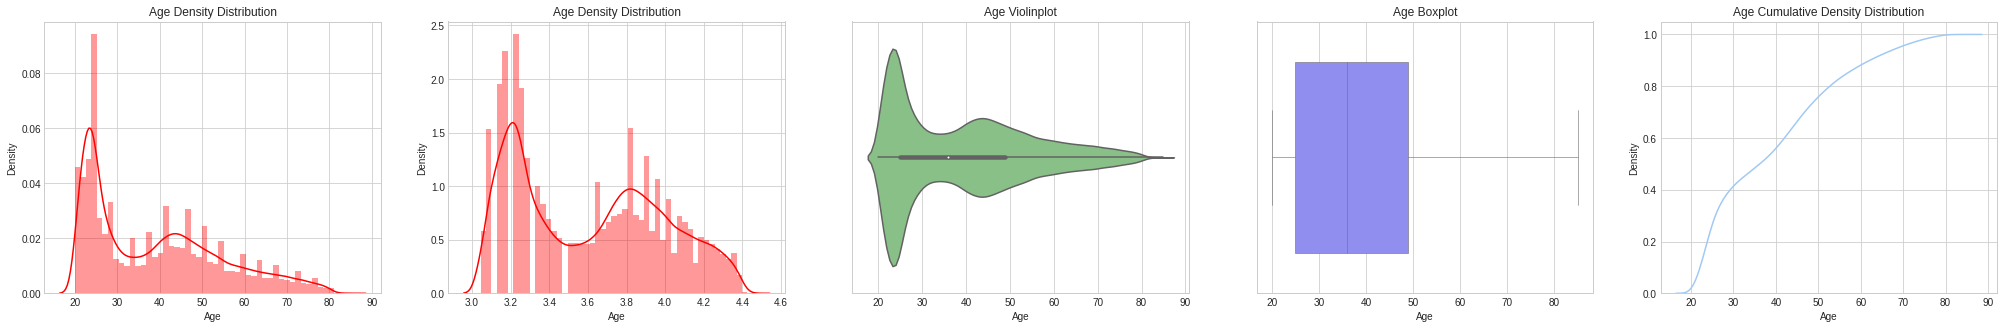

5 Point Summary of Annual_premium Attribute:
Annual_premium(min) : 2630.0
Q1                    : 24426.0
Q2(Median)            : 31678.5
Q3                    : 39408.0
Annual_premium(max) : 540165.0
Total number of outliers in Annual_Premium distribution: 10331.
Skewness of Annual_Premium: 1.7699758877598497.


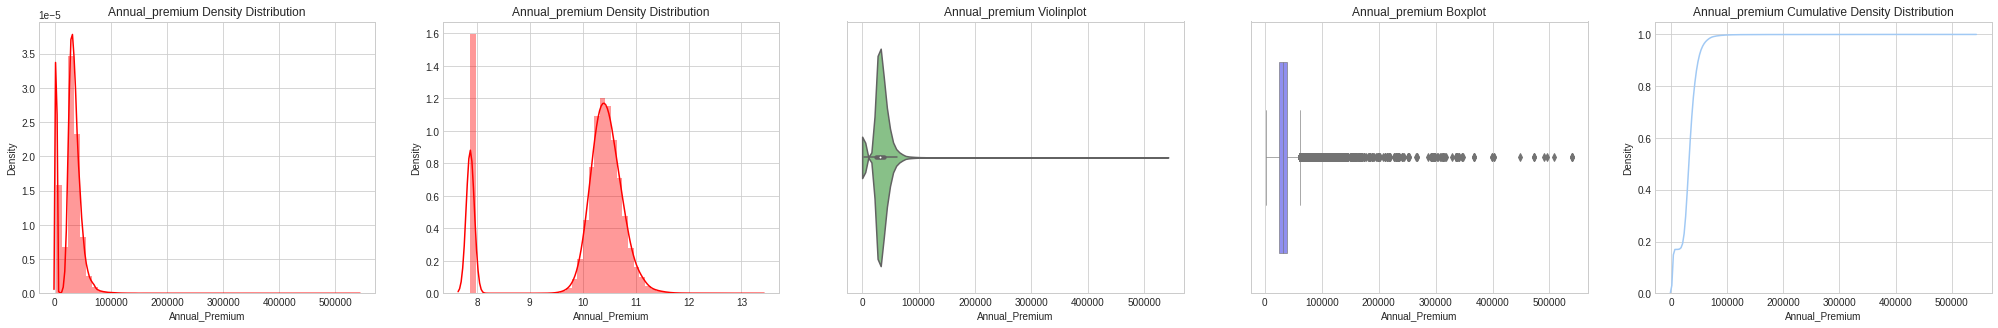

5 Point Summary of Vintage Attribute:
Vintage(min) : 10
Q1                    : 82.0
Q2(Median)            : 154.0
Q3                    : 227.0
Vintage(max) : 299
Total number of outliers in Vintage distribution: 0.
Skewness of Vintage: 0.00305128680797489.


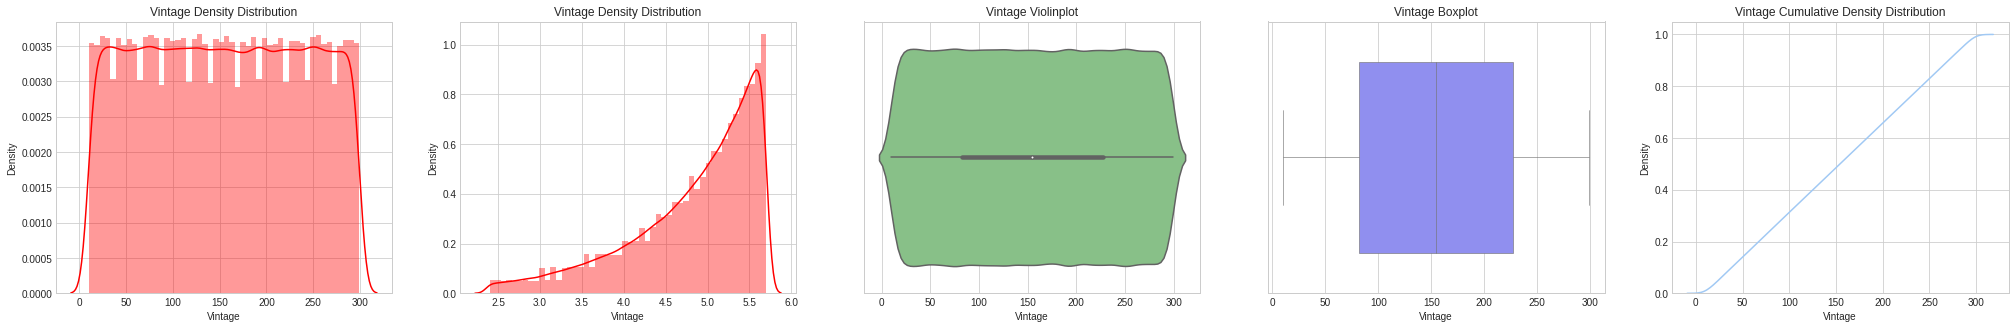

5 Point Summary of Region_code Attribute:
Region_code(min) : 0.0
Q1                    : 15.0
Q2(Median)            : 28.0
Q3                    : 35.0
Region_code(max) : 52.0
Total number of outliers in Region_Code distribution: 0.
Skewness of Region_Code: -0.1151836961542429.


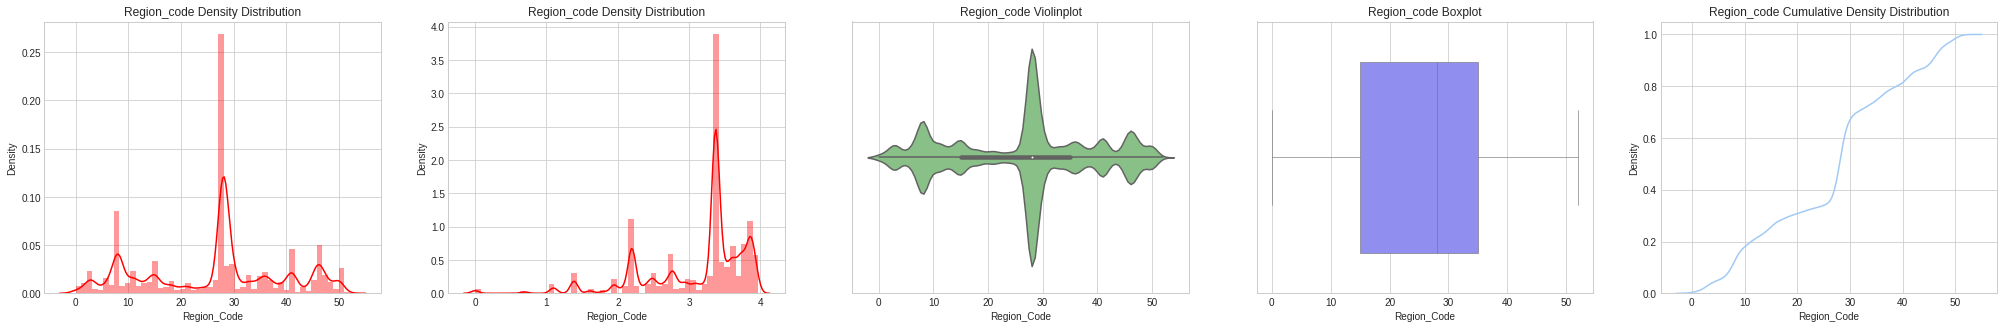

5 Point Summary of Policy_sales_channel Attribute:
Policy_sales_channel(min) : 1.0
Q1                    : 29.0
Q2(Median)            : 133.0
Q3                    : 152.0
Policy_sales_channel(max) : 163.0
Total number of outliers in Policy_Sales_Channel distribution: 0.
Skewness of Policy_Sales_Channel: -0.8998357695586765.


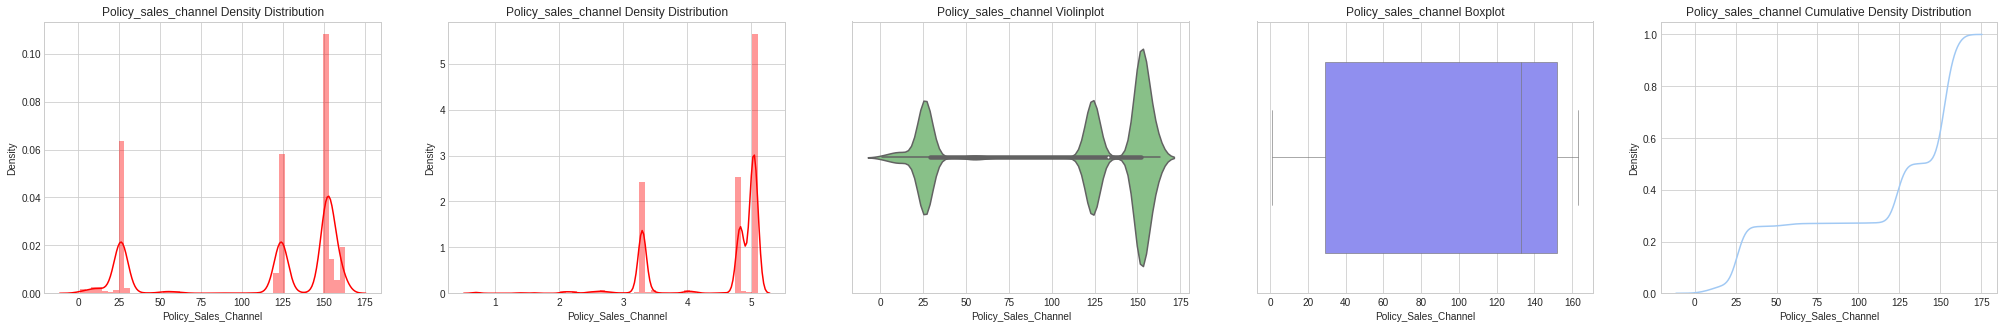

In [39]:
for col in numerical_feat:
  summary(col)

In [98]:
df['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [102]:
df['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [103]:
df.groupby('Policy_Sales_Channel').apply(lambda x: x['Response'].value_counts(normalize=True).T).reset_index()

,Policy_Sales_Channel,level_1,Response
0,1.0,0,0.967412
1,1.0,1,0.032588
2,2.0,0,0.750000
3,2.0,1,0.250000
4,3.0,0,0.695985
...,...,...,...
269,159.0,1,0.019608
270,160.0,0,0.978190
271,160.0,1,0.021810
272,163.0,0,0.695817


##Catagorical feature analysis

In [85]:
#Let's construct function for pie-chart, countplot,
def cat_summary(x):
  fig = plt.figure(figsize=(8, 10))

  plt.subplots_adjust(hspace = 0.6)
  sns.set_palette('pastel')

  ax1 = sns.catplot(x, col="Response",
                data=df, kind='count',
                height=4, aspect=.7)


PSC_code
Gender
Vehicle_Damage
Vehicle_Age
Driving_License
Previously_Insured


<Figure size 576x720 with 0 Axes>

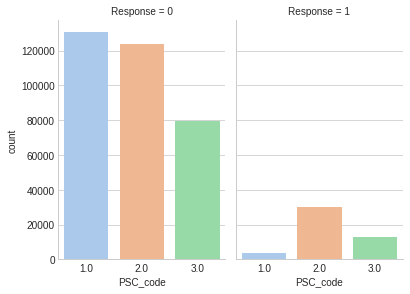

<Figure size 576x720 with 0 Axes>

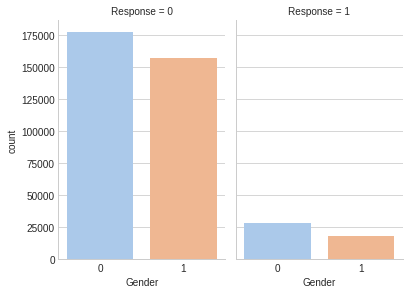

<Figure size 576x720 with 0 Axes>

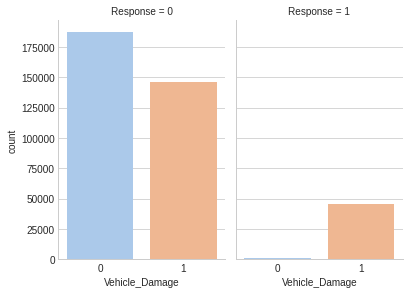

<Figure size 576x720 with 0 Axes>

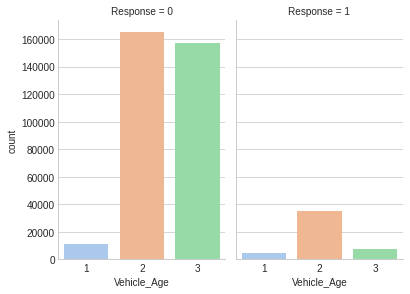

<Figure size 576x720 with 0 Axes>

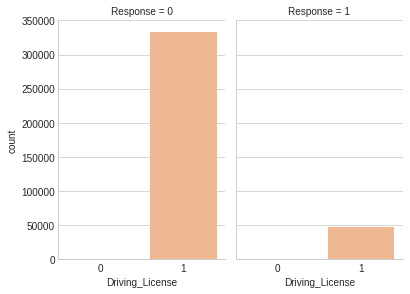

<Figure size 576x720 with 0 Axes>

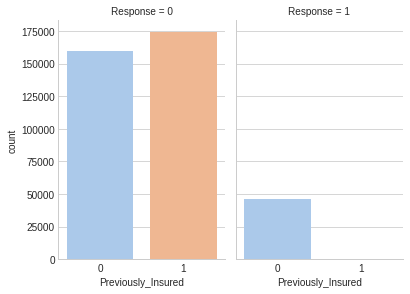

In [96]:
for col in catagorical_feat:
  print(col)
  cat_summary(col)

##Observation
1. 

In [42]:
#Let's construct function for countplot,
def cat_summary2(x,hue='Gender'):
  fig = plt.figure(figsize=(8, 5))

  plt.subplots_adjust(hspace = 0.6)
  sns.set_palette('pastel')

  ax1 = sns.catplot(x, hue=hue, col="Response",
                data=df, kind='count',
                height=4, aspect=.7)

<Figure size 576x360 with 0 Axes>

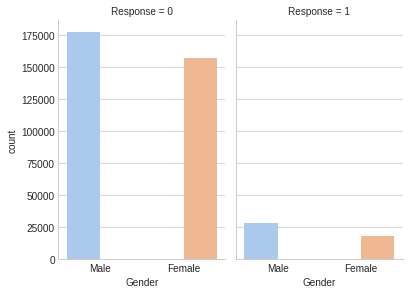

<Figure size 576x360 with 0 Axes>

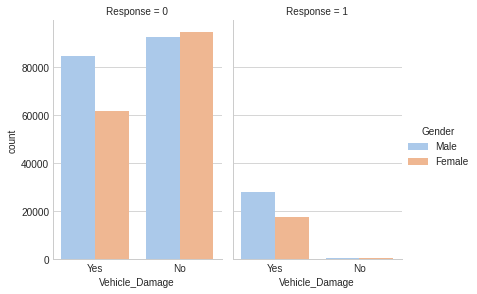

<Figure size 576x360 with 0 Axes>

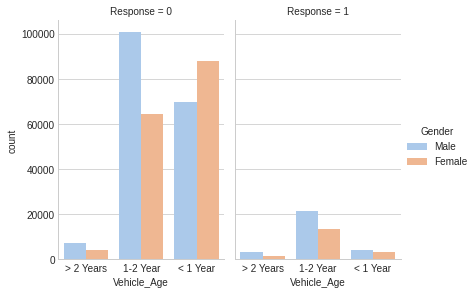

<Figure size 576x360 with 0 Axes>

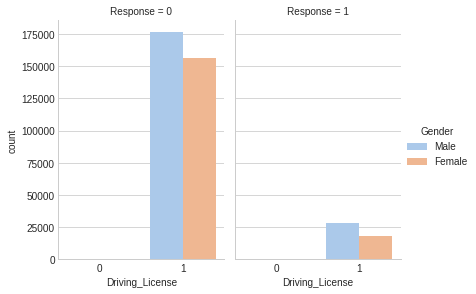

<Figure size 576x360 with 0 Axes>

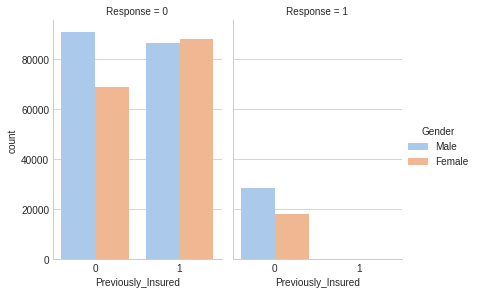

In [43]:
for col in catagorical_feat:
  cat_summary2(col,'Gender')

#From above plot we can say that gender does not have any major impact on response




<Figure size 576x360 with 0 Axes>

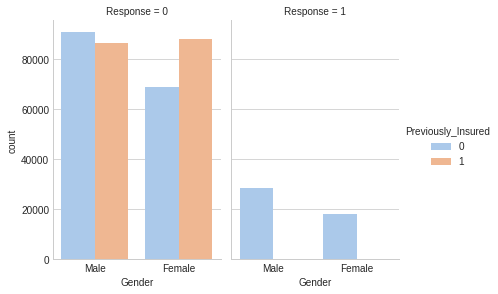

<Figure size 576x360 with 0 Axes>

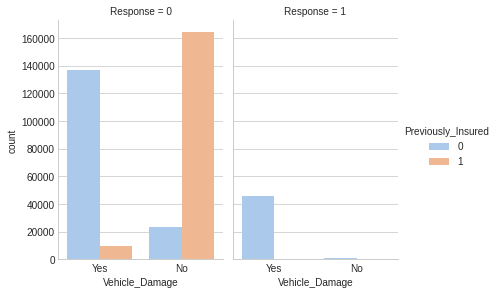

<Figure size 576x360 with 0 Axes>

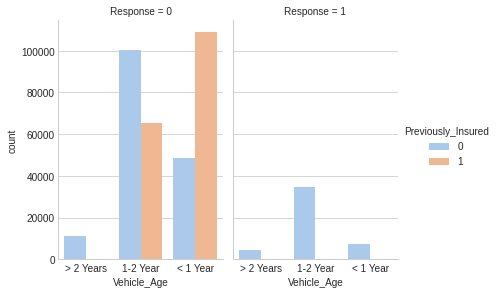

<Figure size 576x360 with 0 Axes>

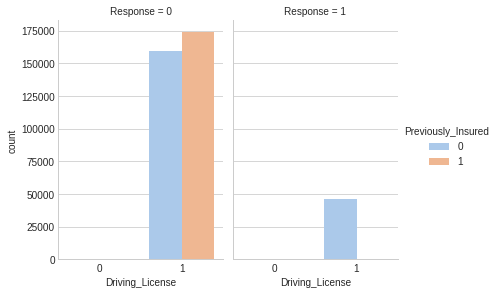

<Figure size 576x360 with 0 Axes>

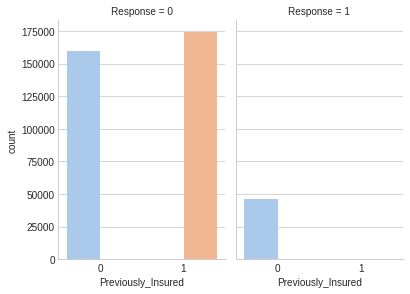

In [44]:
for col in catagorical_feat:
  cat_summary2(col,'Previously_Insured')

In [45]:
# df[df['Policy_Sales_Channel']==1].size

In [46]:
# df[df['Policy_Sales_Channel']==1].size

In [47]:
df1=df.groupby('Policy_Sales_Channel',as_index=False).size()

In [48]:
df=df.merge(df1,on='Policy_Sales_Channel',how='left')

In [49]:
df['size']=(df['size']/df.size)*100

In [50]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,size
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1.742770
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1.742770
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.742770
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,2.946994
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,2.946994
...,...,...,...,...,...,...,...,...,...,...,...,...
380835,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1.742770
380836,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,2.946994
380837,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0.476337
380838,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1.617652


In [51]:
df.rename(columns={'size':'PSC_percent'},inplace=True)

In [52]:
df[(df['PSC_percent']>1) & (df['PSC_percent']<2)]['Policy_Sales_Channel'].size

153574

In [53]:
# df['new_PSC']=np.where(df['PSC_percent']>2,1,np.where((df['PSC_percent']<2)and (df['PSC_percent']>1),2,3))
col         = 'PSC_percent'
conditions  = [ df[col] >= 2, (df[col] < 2) & (df[col]> 1), df[col] <= 1 ]
choices     = [ 1, 2, 3 ]
    
df["PSC_code"] = np.select(conditions, choices, default=np.nan)

In [54]:
df['PSC_percent'].sort_values(ascending=False).unique()


array([2.94699436e+00, 1.74277037e+00, 1.61765221e+00, 4.76337395e-01,
       2.32862444e-01, 2.17260967e-01, 1.46102475e-01, 1.31113679e-01,
       8.49875713e-02, 6.33030494e-02, 4.08089136e-02, 4.04150474e-02,
       3.49446837e-02, 3.31504044e-02, 3.08528516e-02, 2.76581592e-02,
       2.70017155e-02, 2.63233904e-02, 2.35006827e-02, 2.30849351e-02,
       2.24503729e-02, 1.93650877e-02, 1.84460666e-02, 1.71331793e-02,
       1.68268389e-02, 1.64110913e-02, 1.38071981e-02, 1.36102650e-02,
       1.32820432e-02, 1.26693625e-02, 1.14440010e-02, 1.13127123e-02,
       1.11376606e-02, 1.07656759e-02, 9.23397402e-03, 7.26464307e-03,
       6.82701397e-03, 5.77670413e-03, 4.85768302e-03, 4.04806918e-03,
       4.02618773e-03, 3.82925463e-03, 3.80737318e-03, 3.69796590e-03,
       3.65420299e-03, 3.45726989e-03, 3.36974407e-03, 3.32598116e-03,
       3.23845534e-03, 3.12904807e-03, 2.99775934e-03, 2.88835206e-03,
       2.77894479e-03, 2.71330042e-03, 2.64765606e-03, 2.40696005e-03,
      

In [55]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,PSC_percent,PSC_code
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1.742770,2.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1.742770,2.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.742770,2.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,2.946994,1.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,2.946994,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380835,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,1.742770,2.0
380836,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,2.946994,1.0
380837,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0.476337,3.0
380838,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1.617652,2.0


In [56]:
#Add PSC_code to catagorical feature
catagorical_feat=list(set(catagorical_feat)- {'Policy_Sales_Channel'})
catagorical_feat= ['PSC_code']+catagorical_feat
catagorical_feat

['PSC_code',
 'Gender',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Driving_License',
 'Previously_Insured']

In [57]:
catagorical_feat

['PSC_code',
 'Gender',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Driving_License',
 'Previously_Insured']

In [58]:
# df['new_PSC']=np.where(df['PSC_percent']>2,1,np.where((df['PSC_percent']<2)and (df['PSC_percent']>1),2,3))
col         = 'Age'
conditions  = [ df[col]>=60, (df[col] <60 ) & (df[col]>30), df[col] <= 30 ]
choices     = [ 1, 2, 3 ]
    
df["Age_code"] = np.select(conditions, choices, default=np.nan)

In [59]:
df.drop(['PSC_percent'],axis=1,inplace=True)
df.drop(['Policy_Sales_Channel'],axis=1,inplace=True)
df.drop(['Age'],axis=1,inplace=True)

In [60]:
df.replace({'Vehicle_Age':{'> 2 Years':1,'1-2 Year':2,'< 1 Year':3},
            'Gender':{'Male':0,'Female': 1},
            'Vehicle_Damage':{'Yes':1,'No':0}},inplace=True)

In [62]:
df

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,PSC_code,Age_code
0,0,1,28.0,0,1,1,40454.0,217,1,2.0,2.0
1,0,1,3.0,0,2,0,33536.0,183,0,2.0,1.0
2,0,1,28.0,0,1,1,38294.0,27,1,2.0,2.0
3,0,1,11.0,1,3,0,28619.0,203,0,1.0,3.0
4,1,1,41.0,1,3,0,27496.0,39,0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
380835,0,1,26.0,1,2,0,30170.0,88,0,2.0,1.0
380836,0,1,37.0,1,3,0,40016.0,131,0,1.0,3.0
380837,0,1,30.0,1,3,0,35118.0,161,0,3.0,3.0
380838,1,1,14.0,0,1,1,44617.0,74,0,2.0,1.0


In [63]:
# sns.pairplot(df,hue='Response',corner=True)

In [64]:
# Let's create numpy arrays for features and target
X = df.drop('Response',axis=1).values
y = df['Response'].values

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [66]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

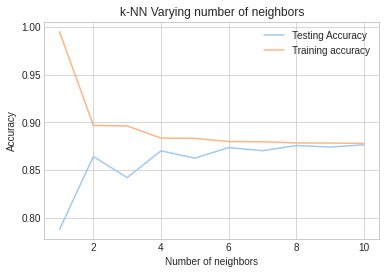

In [67]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [68]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=10)

In [69]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [70]:
knn.score(X_test,y_test)

0.8763916605398593

In [71]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [72]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

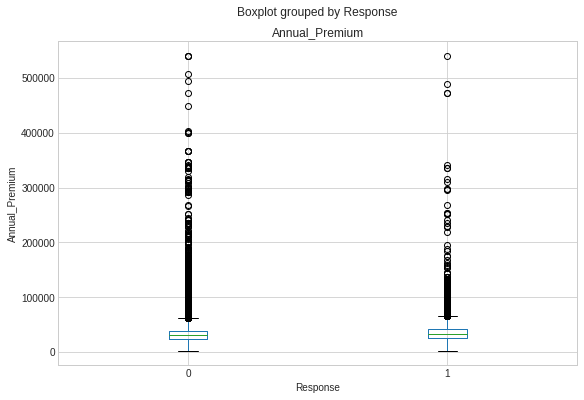

In [21]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'Annual_Premium', by = 'Response', ax = ax)
ax.set_ylabel("Annual_Premium")
plt.show()

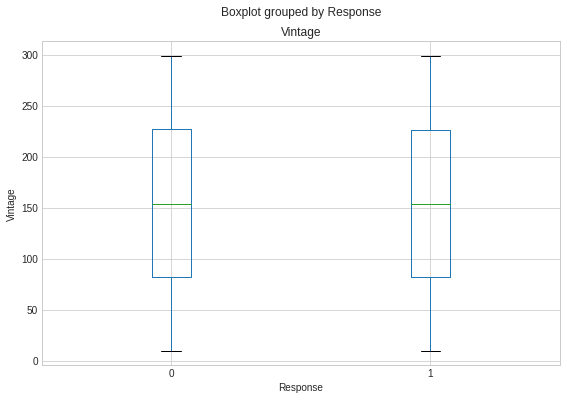

In [22]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'Vintage', by = 'Response', ax = ax)
ax.set_ylabel("Vintage")
plt.show()

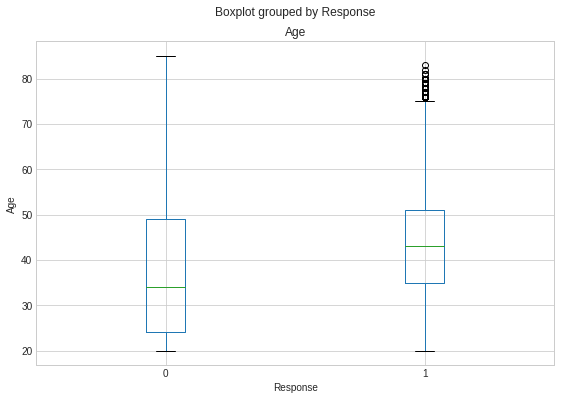

In [23]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'Age', by = 'Response', ax = ax)
ax.set_ylabel("Age")
plt.show()

In [73]:
confusion_matrix(y_test,y_pred) 

array([[133432,    230],
       [ 18600,     74]])

In [74]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

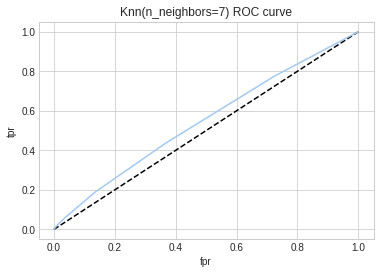

In [76]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [77]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5469966346867364

In [78]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [79]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[10,14,18,25,35,45]}

In [80]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [10, 14, 18, 25, 35, 45]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
knn_cv.best_score_

0.8774157126352276

In [82]:
knn_cv.best_params_

{'n_neighbors': 45}

In [93]:
df['Response'].stack()
# df.plot(x='Region_Code', kind='bar', stacked=True,
#         title='Stacked Bar Graph by dataframe')

AttributeError: ignored